In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(font_scale=1.5)
p = sns.color_palette("Set2")
sns.palplot(p)
sns.set_palette(p)
cmap = plt.cm.get_cmap('Spectral')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
out_fake_gan = './PR/Synthetic1/'
out_fake_vae = './PR/Synthetic2/'
out_real = './PR/Real/'
N_IMG = 100

In [3]:
imgs = np.load('real_circles.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(out_real + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [4]:
imgs = np.load('./GAN/synthetic_gan.npy')
imgs = imgs / 2 + 0.5  # Rescale to 0->1
for i, img in enumerate(imgs):
    img[img < 0.8] = 0
    img[img >= 0.8] = 1
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(out_fake_gan + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [5]:
imgs = np.load('./VAE/synthetic_vae.npy')
for i, img in enumerate(imgs):
    img[img < 0.8] = 0
    img[img >= 0.8] = 1
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(out_fake_vae + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

Example

> pythonw prd_from_image_folders.py --inception_path Inception/inception.pb --reference_dir Real --eval_dirs Synthetic1 Synthetic2 --eval_labels gan vae --cache_dir Tmp

In [32]:
pr = np.load('precision_recall_pairs.npy')
pr_1 = pr[0, :, :]
pr_2 = pr[1, :, :] * 20 

/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


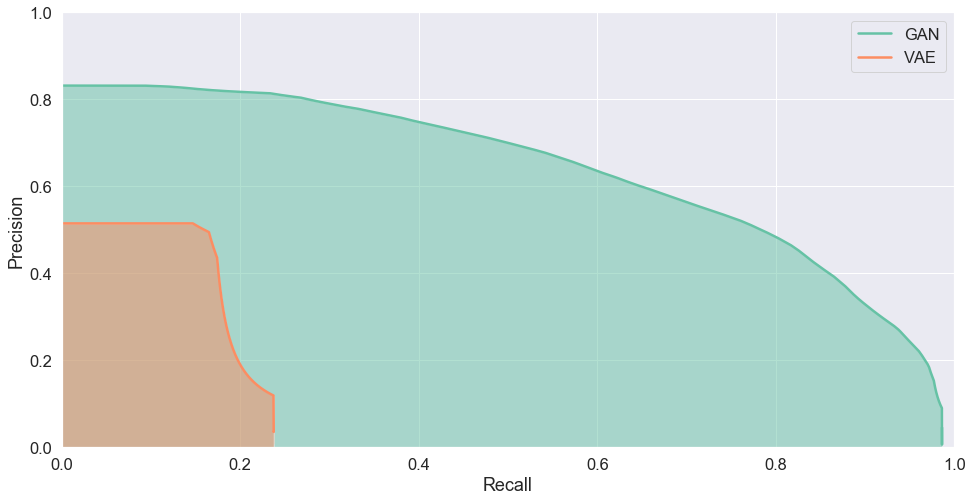

In [33]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=pr_1[1, :], y=pr_1[0, :], label='GAN')
plt.fill_between(x=pr_1[1, :], y1=pr_1[0, :], y2=0, alpha=0.5)
s = sns.lineplot(x=pr_2[1, :], y=pr_2[0, :], label='VAE')
plt.fill_between(x=pr_2[1, :], y1=pr_2[0, :], y2=0, alpha=0.5)
s.set_xlim(0, 1)
s.set_ylim(0, 1)
s.set_xlabel('Recall')
s.set_ylabel('Precision')

plt.savefig('pr-basic', bbox_inches='tight', pad_inches=0)
plt.show()